<h1>Predicts price of FB for specific day using SVR</h1>

In [0]:
import csv
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving FB_30_days.csv to FB_30_days.csv


In [0]:
df = pd.read_csv('FB_30_days.csv')

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-01,194.779999,196.179993,193.009995,193.029999,193.029999,15996600
1,2019-05-02,193.000000,194.000000,189.750000,192.529999,192.529999,13209500
2,2019-05-03,194.380005,196.160004,193.710007,195.470001,195.470001,14575400
3,2019-05-06,191.240005,194.279999,190.550003,193.880005,193.880005,13994900
4,2019-05-07,192.539993,192.899994,187.850006,189.770004,189.770004,16253000


In [0]:
#Create X and y datasets
dates = []
prices = []

In [5]:
df.shape

(22, 7)

In [6]:
#Last row of data (testing data)
df.tail(1)

,Date,Open,High,Low,Close,Adj Close,Volume
21,2019-05-31,180.279999,180.539993,177.160004,177.470001,177.470001,15226500


In [11]:
#All data except for last row
df = df.head(len(df)-1)
print(df.shape)

(20, 7)


In [0]:
#All rows from date column
df_dates = df.loc[:,'Date']

#All rows from open column
df_open = df.loc[:,'Open']

In [0]:
#Create independent dataset (X) as dates
for date in df_dates:
  dates.append([int(date.split('-')[2])])

#Create dependent dataset (y) as prices
for open_price in df_open:
  prices.append(float(open_price))

In [14]:
dates

[[1],
 [2],
 [3],
 [6],
 [7],
 [8],
 [9],
 [10],
 [13],
 [14],
 [15],
 [16],
 [17],
 [20],
 [21],
 [22],
 [23],
 [24],
 [28],
 [29],
 [30]]

In [0]:
#function to make predictions using 3 different SVR models
def predict_prices(dates,prices,x):

  #Linear Regression (C = error term)
  svr_lin = SVR(kernel='linear',C=1e3)
  svr_lin.fit(dates,prices)

  #Polynomial
  svr_poly = SVR(kernel='poly',C=1e3, degree=2)
  svr_poly.fit(dates,prices)

  #RBF
  svr_rbf = SVR(kernel='rbf',C=1e3, gamma=0.1)
  svr_rbf.fit(dates,prices)

  #Plot Predictions to see which has best fit
  plt.scatter(dates,prices,color='black',label='Data')
  plt.scatter(dates,svr_lin.predict(dates),color='red',label='Linear')
  plt.scatter(dates,svr_poly.predict(dates),color='green',label='Poly')
  plt.scatter(dates,svr_rbf.predict(dates),color='blue',label='RBF')
  plt.title('Support Vector Regression',fontsize=20)
  plt.xlabel('Date',fontsize=20)
  plt.ylabel('Price',fontsize=20)
  plt.legend(loc='best')
  plt.show()

  #Return all 3 model predictions
  return svr_lin.predict(x)[0],svr_poly.predict(x)[0],svr_rbf.predict(x)[0]

  


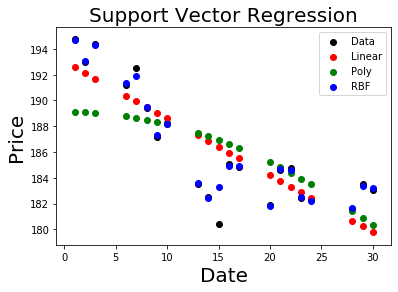

(179.34125331240614, 179.7025944161506, 180.33354977415465)


In [19]:
#Predict the price of FB on day 31 (last day)
predicted_price = predict_prices(dates,prices,[[31]])
print(predicted_price)